Code with new CSV

Research questions: What is the relationship between income & breast cancer survival months? Is there one?
What is the relationship between race & breast cancer survival months? Is there one?
What is the relationship between age & breast cancer survival months? Is there one?
What is the relationship between income & stage at diagnosis? Is there one?
What is the relationship between race & stage at diagnosis? Is there one?
What is the relationship between age & stage at diagnosis? Is there one?
How do the breast cancer stages (T, N, M) affect survival months?

Below is the imports for the project

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr


import pandas as pd
import numpy as np
import sklearn as sklearn

CSV File

In [2]:
data = pd.read_csv("bcfile.csv")

In [3]:
df = pd.DataFrame(data)

Getting a sense of how the data looks

In [4]:
df.head

<bound method NDFrame.head of         Race recode (W, B, AI, API) Breast - Adjusted AJCC 6th T (1988-2015)  \
0                             White                                 Blank(s)   
1                             White                                 Blank(s)   
2                             White                                 Blank(s)   
3                             White                                 Blank(s)   
4                             White                                 Blank(s)   
...                             ...                                      ...   
8720790                       White                                 Blank(s)   
8720791                       White                                 Blank(s)   
8720792                       White                                 Blank(s)   
8720793                       White                                 Blank(s)   
8720794                       White                                 Blank(s)   

        B

In [5]:
df.columns

Index(['Race recode (W, B, AI, API)',
       'Breast - Adjusted AJCC 6th T (1988-2015)',
       'Breast - Adjusted AJCC 6th N (1988-2015)',
       'Breast - Adjusted AJCC 6th M (1988-2015)', 'Patient ID',
       'Age recode with single ages and 85+',
       'Median household income inflation adj to 2019', 'Survival months'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8720795 entries, 0 to 8720794
Data columns (total 8 columns):
 #   Column                                         Dtype 
---  ------                                         ----- 
 0   Race recode (W, B, AI, API)                    object
 1   Breast - Adjusted AJCC 6th T (1988-2015)       object
 2   Breast - Adjusted AJCC 6th N (1988-2015)       object
 3   Breast - Adjusted AJCC 6th M (1988-2015)       object
 4   Patient ID                                     int64 
 5   Age recode with single ages and 85+            object
 6   Median household income inflation adj to 2019  object
 7   Survival months                                object
dtypes: int64(1), object(7)
memory usage: 532.3+ MB


In [7]:
df.describe()

,Patient ID
count,8.720795e+06
mean,3.280007e+07
std,1.796316e+07
min,2.100000e+01
25%,1.678673e+07
50%,3.429164e+07
75%,4.956419e+07
max,6.321090e+07


Get rid of 'Blanks', nan, and 'Unknown'

In [8]:
df.isna().any()

Race recode (W, B, AI, API)                      False
Breast - Adjusted AJCC 6th T (1988-2015)          True
Breast - Adjusted AJCC 6th N (1988-2015)          True
Breast - Adjusted AJCC 6th M (1988-2015)          True
Patient ID                                       False
Age recode with single ages and 85+              False
Median household income inflation adj to 2019    False
Survival months                                  False
dtype: bool

In [9]:
df.dropna(inplace=True)

In [10]:
# drop na seems to have removed 'Blanks' rows
df = df[~df['Breast - Adjusted AJCC 6th T (1988-2015)'].str.contains('Blank\(s\)')]

In [11]:
# drop na seems to have removed 'Unknown' rows
df = df[~df['Survival months'].str.contains('Unknown')]

In [12]:
print(df['Breast - Adjusted AJCC 6th T (1988-2015)'].unique())

['TX Adjusted' 'Tis' 'T4a' 'T4b' 'T1c' 'T3' 'T1b' 'T1a' 'T4d'
 'Any T, Mets' 'T2' 'T1mic' 'T4c' 'T0']


In [13]:
print(df['Breast - Adjusted AJCC 6th N (1988-2015)'].unique())

['NX Adjusted' 'N0' 'N1' 'N3' 'N2']


In [14]:
print(df['Breast - Adjusted AJCC 6th M (1988-2015)'].unique())

['M0' 'MX' 'M1']


In [15]:
# checks for nan's and blanks after
df.isna().any()

Race recode (W, B, AI, API)                      False
Breast - Adjusted AJCC 6th T (1988-2015)         False
Breast - Adjusted AJCC 6th N (1988-2015)         False
Breast - Adjusted AJCC 6th M (1988-2015)         False
Patient ID                                       False
Age recode with single ages and 85+              False
Median household income inflation adj to 2019    False
Survival months                                  False
dtype: bool

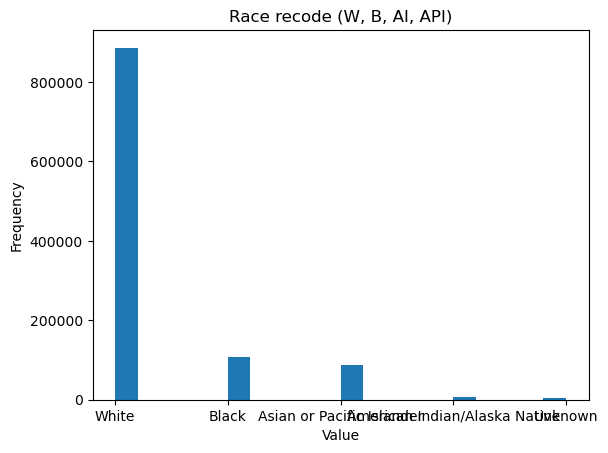

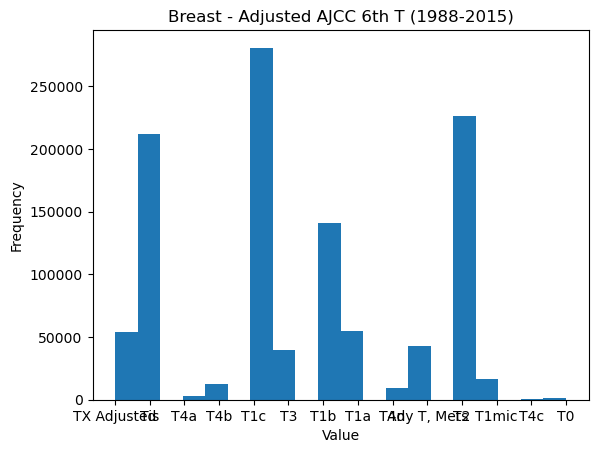

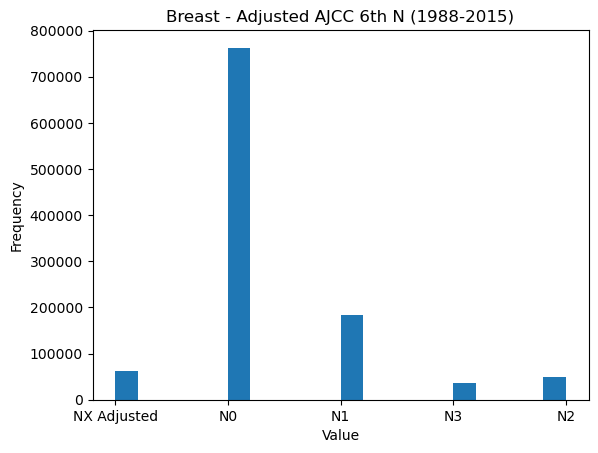

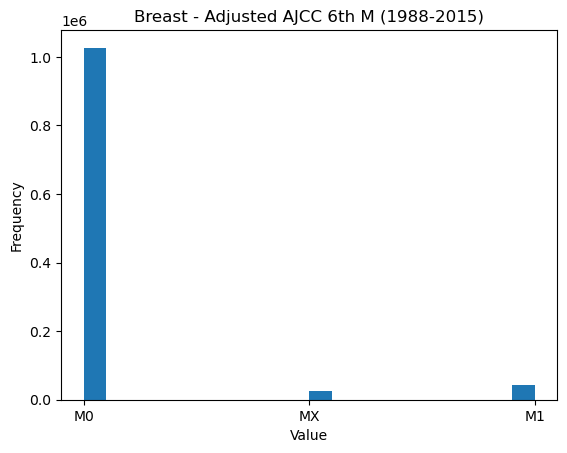

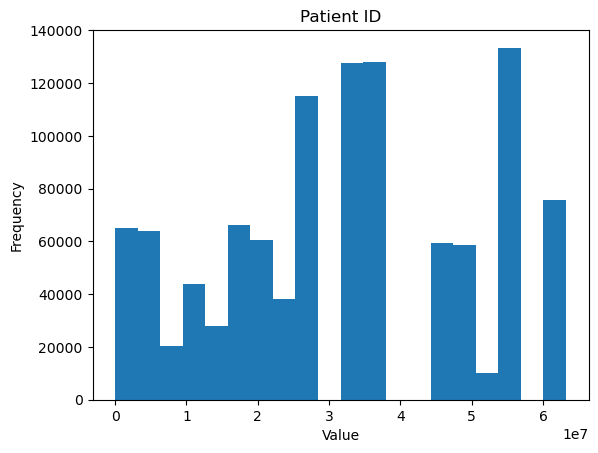

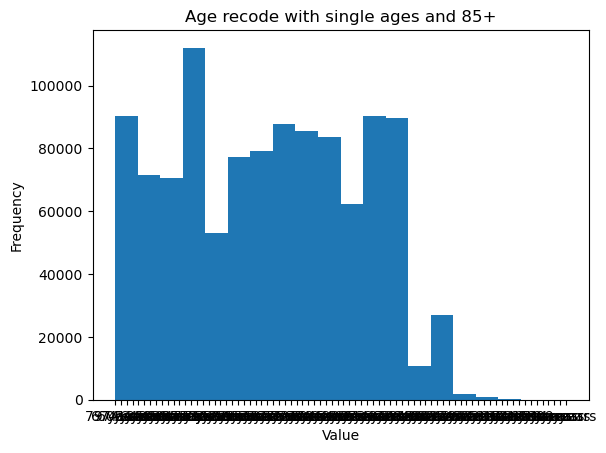

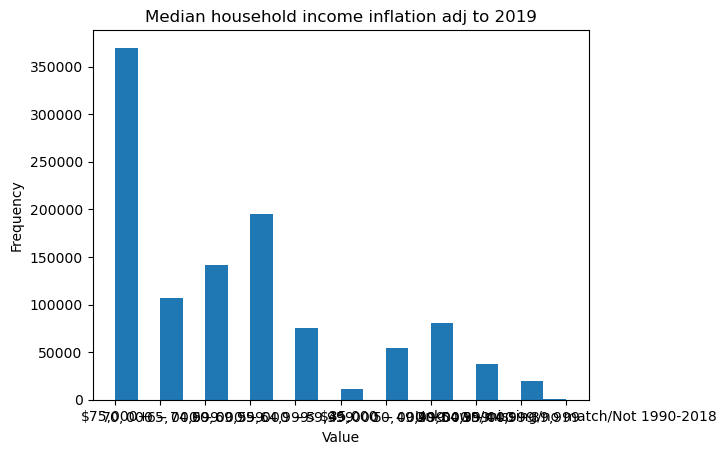

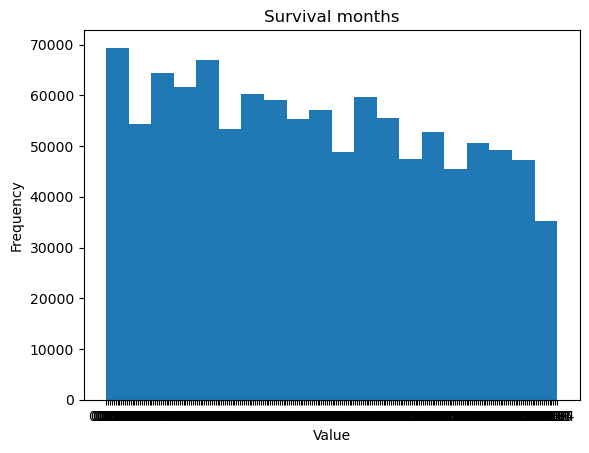

In [16]:
import matplotlib.pyplot as plt

for col in df.columns:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

One hot encoding for columns

In [17]:
race_encode = 'Race recode (W, B, AI, API)'

race_encoded = pd.get_dummies(df[race_encode], prefix = race_encode)

df = pd.concat([df, race_encoded], axis=1)

df.drop('Race recode (W, B, AI, API)', axis=1, inplace=True)

In [18]:
sixthstage_encode = 'Breast - Adjusted AJCC 6th T (1988-2015)'

sixthstage_encoded = pd.get_dummies(df[sixthstage_encode], prefix = sixthstage_encode)

df = pd.concat([df, sixthstage_encoded], axis=1)

df.drop('Breast - Adjusted AJCC 6th T (1988-2015)', axis=1, inplace=True)

In [19]:
nstage_encode = 'Breast - Adjusted AJCC 6th N (1988-2015)'

nstage_encoded = pd.get_dummies(df[nstage_encode], prefix = nstage_encode)

df = pd.concat([df, nstage_encoded], axis=1)

df.drop('Breast - Adjusted AJCC 6th N (1988-2015)', axis=1, inplace=True)

In [20]:
mstage_encode = 'Breast - Adjusted AJCC 6th M (1988-2015)'

mstage_encoded = pd.get_dummies(df[mstage_encode], prefix = mstage_encode)

df = pd.concat([df, mstage_encoded], axis=1)

df.drop('Breast - Adjusted AJCC 6th M (1988-2015)', axis=1, inplace=True)

Cleaning data for age, income, and race

In [21]:
# instead of encoding age, remove "years" from value and change it to int type
df['Age recode with single ages and 85+'] = df['Age recode with single ages and 85+'].str.replace(' years', '')

# # there is a value with 85+ years, so replace '85+' with 85
df['Age recode with single ages and 85+'] = df['Age recode with single ages and 85+'].replace('85+', '85')

# convert 'Age recode' column to int
df['Age recode with single ages and 85+'] = df['Age recode with single ages and 85+'].astype(int)

In [22]:
print(df['Age recode with single ages and 85+'].unique())

[79 67 60 74 41 54 64 35 44 82 83 56 84 62 85 71 59 75 30 34 58 78 50 36
 55 57 68 53 37 61 52 76 72 77 63 80 70 49 45 42 48 46 28 65 81 73 66 43
 47 69 51 29 31 38 40 39 32 33 21 27 24 26 22 23 25 18 20 19 17 13  2 16
 12 15  8 10 14  9]


In [23]:
income_encode = 'Median household income inflation adj to 2019'

income_encoded = pd.get_dummies(df[income_encode], prefix = income_encode)

df = pd.concat([df, income_encoded], axis=1)

df.drop('Median household income inflation adj to 2019', axis=1, inplace=True)

In [24]:
print(income_encoded.columns.unique())

Index(['Median household income inflation adj to 2019_$35,000 - $39,999',
       'Median household income inflation adj to 2019_$40,000 - $44,999',
       'Median household income inflation adj to 2019_$45,000 - $49,999',
       'Median household income inflation adj to 2019_$50,000 - $54,999',
       'Median household income inflation adj to 2019_$55,000 - $59,999',
       'Median household income inflation adj to 2019_$60,000 - $64,999',
       'Median household income inflation adj to 2019_$65,000 - $69,999',
       'Median household income inflation adj to 2019_$70,000 - $74,999',
       'Median household income inflation adj to 2019_$75,000+',
       'Median household income inflation adj to 2019_< $35,000',
       'Median household income inflation adj to 2019_Unknown/missing/no match/Not 1990-2018'],
      dtype='object')


In [25]:
print(race_encoded.columns.unique())

Index(['Race recode (W, B, AI, API)_American Indian/Alaska Native',
       'Race recode (W, B, AI, API)_Asian or Pacific Islander',
       'Race recode (W, B, AI, API)_Black',
       'Race recode (W, B, AI, API)_Unknown',
       'Race recode (W, B, AI, API)_White'],
      dtype='object')


In [26]:
print(df['Survival months'].unique())

['0014' '0000' '0081' '0007' '0224' '0048' '0050' '0130' '0028' '0087'
 '0075' '0069' '0089' '0182' '0010' '0129' '0074' '0192' '0017' '0225'
 '0015' '0147' '0062' '0161' '0072' '0146' '0043' '0076' '0115' '0019'
 '0099' '0070' '0029' '0101' '0058' '0012' '0103' '0094' '0053' '0098'
 '0218' '0018' '0223' '0021' '0049' '0171' '0092' '0160' '0222' '0042'
 '0142' '0065' '0059' '0056' '0044' '0151' '0054' '0131' '0106' '0117'
 '0055' '0116' '0005' '0197' '0172' '0122' '0032' '0206' '0239' '0085'
 '0174' '0120' '0107' '0138' '0083' '0073' '0024' '0150' '0002' '0096'
 '0033' '0004' '0040' '0067' '0057' '0009' '0100' '0105' '0123' '0186'
 '0022' '0068' '0104' '0217' '0215' '0210' '0178' '0163' '0031' '0211'
 '0034' '0119' '0154' '0093' '0143' '0111' '0051' '0047' '0008' '0185'
 '0086' '0159' '0052' '0061' '0149' '0221' '0013' '0088' '0234' '0139'
 '0204' '0200' '0135' '0193' '0220' '0212' '0090' '0091' '0037' '0045'
 '0158' '0109' '0125' '0152' '0113' '0011' '0097' '0187' '0025' '0227'
 '0080

In [27]:
df['Survival months'] = df['Survival months'].astype(int)

In [28]:
# convert survival months to bool for kfold validation

In [29]:
print(df.dtypes)

Patient ID                                                                              int64
Age recode with single ages and 85+                                                     int32
Survival months                                                                         int32
Race recode (W, B, AI, API)_American Indian/Alaska Native                               uint8
Race recode (W, B, AI, API)_Asian or Pacific Islander                                   uint8
Race recode (W, B, AI, API)_Black                                                       uint8
Race recode (W, B, AI, API)_Unknown                                                     uint8
Race recode (W, B, AI, API)_White                                                       uint8
Breast - Adjusted AJCC 6th T (1988-2015)_Any T, Mets                                    uint8
Breast - Adjusted AJCC 6th T (1988-2015)_T0                                             uint8
Breast - Adjusted AJCC 6th T (1988-2015)_T1a                

Rerun original code

In [30]:
folds = 5

kf = KFold(n_splits=folds, shuffle=True, random_state=42)

# Define the machine learning model
model = LinearRegression()

Put just age to see if it's a bad score to see if model is accurate.

In [51]:
i = 0
# Iterate over the K folds
for train_index, val_index in kf.split(df):

    # Split the data into training and validation sets
    train_data = df.iloc[train_index]
    val_data = df.iloc[val_index]


    # Define the one hot encoded columns
    cols = df.columns
    cols_list = cols.tolist()
    cols_three = pd.concat([race_encoded, pd.DataFrame(df['Age recode with single ages and 85+']), income_encoded], axis=1)
    # cols_three = pd.DataFrame(df['Age recode with single ages and 85+'])

    # Define training vars
    X_train = train_data[cols_three.columns]
    X_val = val_data[cols_three.columns]
    y_train = train_data['Survival months']
    y_val = val_data['Survival months']

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Calculate mean squared error on validation
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    i = i+1
    print(f"Fold {i} MSE: {mse:.2f} R2: {r2:.2f}")


Fold 1 MSE: 3411.79 R2: 0.08
Fold 2 MSE: 3407.21 R2: 0.08
Fold 3 MSE: 3413.99 R2: 0.08
Fold 4 MSE: 3401.08 R2: 0.08
Fold 5 MSE: 3412.74 R2: 0.08


Linear Regression with PCA

In [43]:
X = pd.concat([race_encoded, pd.DataFrame(df['Age recode with single ages and 85+']), income_encoded], axis=1)
y = df['Survival months']

In [38]:
X = df.drop(columns=['Survival months'])
y = df['Survival months']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [45]:
# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [46]:
# perform PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

In [47]:
# print the explained variance ratio
print(pca.explained_variance_ratio_)

[0.11361061 0.08647954 0.07103017]


This means that the total variance for PCA is low (around 27.16% in total). Since I applied PCA, low total variance means that the total amount of variability in the data captured by the principal components is relatively small. I assume this is happening because there is a predominant amount of one value (in race_encoded) that makes the data more homogenous.

Experiment with Spearmanr Coefficient (rec by Sheena) to see if there is a relationship between variables, this is displayed as a matrix, doesn't tell me much.

In [37]:
corr, pval = spearmanr(X, y)

print("Spearmanr Coefficient: %0.3f", corr)

Spearmanr Coefficient: %0.3f [[ 1.00000000e+00 -2.17490729e-02 -2.42697660e-02 -5.25407393e-03
  -1.51930270e-01 -1.68546936e-02  8.17771248e-03 -1.51319248e-03
   3.85056782e-03  1.46367113e-02  1.56394062e-04 -1.37815470e-02
  -6.72016117e-03 -9.71360266e-03  8.19307338e-03  9.50920975e-03
   3.36588843e-03 -5.17439641e-03]
 [-2.17490729e-02  1.00000000e+00 -9.78230604e-02 -2.11773608e-02
  -6.12378546e-01 -7.82811939e-02 -3.80369694e-02 -5.12212205e-02
  -5.80078105e-02 -6.38734505e-02 -4.62397692e-02  3.61656843e-02
  -2.45085063e-02 -3.44549237e-02  1.33628484e-01 -2.94367174e-02
  -4.45412628e-03  8.45932925e-03]
 [-2.42697660e-02 -9.78230604e-02  1.00000000e+00 -2.36317931e-02
  -6.83352529e-01 -5.81259081e-02  6.44433136e-02  8.84588386e-02
   2.52325970e-02  1.84933273e-02  2.46756765e-02  2.24403114e-02
  -5.70832280e-03 -2.71335539e-02 -8.81169350e-02  1.75323409e-02
  -4.11841243e-03 -5.89436374e-02]
 [-5.25407393e-03 -2.11773608e-02 -2.36317931e-02  1.00000000e+00
  -1.479

What is the relationship between income & breast cancer survival months? Is there one?